##October 12, 2015

###Part 1: Test the correlation of the age distribution of male riders and female riders  
Data Source: January 2015 Citibike Data (file path: please download file '201501-citibike-tripdata.csv' and store in local folder)

In [5]:
%pylab inline
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
#df is the dataframe where the content of the csv file is stored
df = pd.read_csv('201501-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [5]:
#Male Riders and Female Riders
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [11]:
print df.ageM

0        NaN
1         52
2         41
3         46
4         38
5        NaN
6         43
7        NaN
8         24
9         24
10        36
11        35
12        28
13        27
14        32
15        36
16        56
17        44
18        38
19        35
20        43
21        53
22        28
23        27
24       NaN
25        46
26       NaN
27       NaN
28       NaN
29        29
          ..
285522    36
285523    25
285524    32
285525    33
285526   NaN
285527    42
285528    36
285529    49
285530    54
285531    47
285532   NaN
285533   NaN
285534    46
285535    28
285536    29
285537    43
285538    29
285539    25
285540    51
285541    26
285542    24
285543   NaN
285544    44
285545    32
285546    45
285547    59
285548    39
285549    21
285550    58
285551    41
Name: ageM, dtype: float64


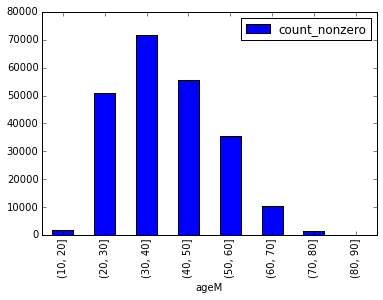

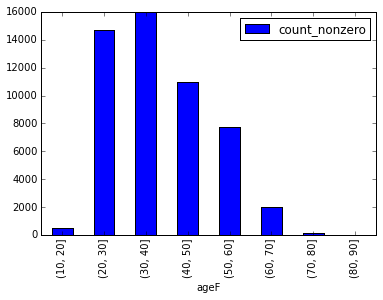

In [4]:
#Age Distribution of Male Riders and Female Riders
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.001656
(20, 30]       0.060938
(30, 40]       0.052105
(40, 50]       0.018598
(50, 60]       0.010887
(60, 70]       0.003129
(70, 80]       0.000113
(80, 90]       0.000000


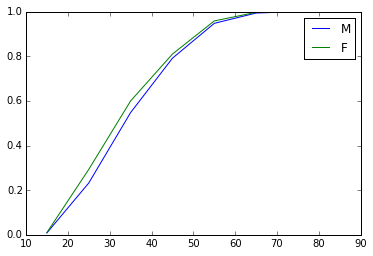

In [5]:
#Plot Cumulative Age Distribution of Male Riders and Female Riders 
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

###By Gender: Pearson's Test

####Clean Data: use "dropna()" to clean "Not Available" data.
####Clean Data: use np.random.choice to make sure sizes of two samples are the same.

In [6]:
dfM = np.random.choice(df['ageM'].dropna(),10000)
dfF = np.random.choice(df['ageF'].dropna(),10000)

In [7]:
ps=scipy.stats.pearsonr(dfM, dfF)

In [9]:
print (ps)

(-0.0071007363026106144, 0.47770797119228747)


I get a large p value, which means the age distributions of male rides and female riders are not correlated.

###By Gender: Spearman's Test

In [46]:
scipy.stats.spearmanr(df.ageM, df.ageF, axis=0)

(-0.43552302983795976, 0.0)

Null Hypothesis: These two distributions are uncorrelated.
The p value is small, we fail to reject the null hypothesis.
The age distributions of male rides and female riders are not correlated.

###By Gender: K-S Test

In [11]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)

In [12]:
print (ks)

(0.61519793242561782, 0.0)


Null Hypothesis: These two distributions are the same (from the same parent distribution.)
The p value is small, we can reject the null hypothesis. 
The two samples are not likely coming from the same parent distribution.

###Part 2: Test the correlation of the age of bikers during the day and during the night

In [49]:
#Get the data of hour of starttime
df['mystarttime'] = pd.to_datetime(df.starttime)
df['hour'] = df['mystarttime'].dt.hour

In [50]:
print df['hour']

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
          ..
285522    23
285523    23
285524    23
285525    23
285526    23
285527    23
285528    23
285529    23
285530    23
285531    23
285532    23
285533    23
285534    23
285535    23
285536    23
285537    23
285538    23
285539    23
285540    23
285541    23
285542    23
285543    23
285544    23
285545    23
285546    23
285547    23
285548    23
285549    23
285550    23
285551    23
Name: hour, dtype: int64


I define day time rider as a person who starts to ride citibike from 6:00AM to 5:59PM

In [52]:
#Daytime Rider
#df is the dataframe where the content of the csv file is stored
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['hour'] < 18) & (df['hour'] >= 6)]

In [53]:
print df['ageD'].dropna()

564       32
565       46
566       44
567       28
568       30
569       27
570       57
571       65
572       20
573       23
574       21
575       43
576       54
577       30
578       31
579       28
580       40
581       33
582       61
583       55
584       30
585       36
586       41
587       48
588       28
589       37
590       50
591       61
592       33
593       43
          ..
284304    52
284305    24
284306    30
284307    27
284308    30
284309    50
284310    41
284311    25
284312    59
284313    49
284315    32
284316    31
284317    57
284318    27
284319    42
284320    46
284321    52
284322    39
284323    39
284324    57
284325    57
284326    50
284327    61
284328    41
284329    28
284330    55
284331    36
284332    41
284333    29
284334    67
Name: ageD, dtype: float64


In [ ]:
#A glimpse of day time rider age 
df['ageD'].describe()

I define night time rider as a person who starts to ride citibike from 6:00PM to 5:59AM

In [54]:
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['hour'] >= 18) | (df['hour'] < 6))]

In [46]:
print df['ageN'].dropna()

0         55
1         52
2         41
3         46
4         38
5         46
6         43
7         30
8         24
9         24
10        36
11        35
12        28
13        27
14        32
15        36
16        56
17        44
18        38
19        35
20        43
21        53
22        28
23        27
25        46
27        19
29        29
30        29
31        29
32        33
          ..
285522    36
285523    25
285524    32
285525    33
285526    27
285527    42
285528    36
285529    49
285530    54
285531    47
285532    29
285533    24
285534    46
285535    28
285536    29
285537    43
285538    29
285539    25
285540    51
285541    26
285542    24
285543    30
285544    44
285545    32
285546    45
285547    59
285548    39
285549    21
285550    58
285551    41
Name: ageN, dtype: float64


In [55]:
#A glimpse of night time rider age 
df['ageN'].describe()

count    80267.000000
mean        38.057197
std         11.152282
min         16.000000
25%         29.000000
50%         36.000000
75%         46.000000
max        116.000000
Name: ageN, dtype: float64

###By Time: Pearson's Test

####Clean Data: use "dropna()" to clean "Not Available" data.
####Clean Data: use np.random.choice to make sure sizes of two samples are the same.

In [57]:
dfD = np.random.choice(df['ageD'].dropna(),10000)
dfN = np.random.choice(df['ageN'].dropna(),10000)

In [58]:
ps=scipy.stats.pearsonr(dfD, dfN)

In [59]:
print (ps)

(-0.0055804943886750826, 0.57685529423742588)


The age distributions of day time rides and night time riders are not correlated.

###By Time: Spearman's Test

In [60]:
scipy.stats.spearmanr(df.ageD, df.ageN, axis=0)

(-0.58866193844129755, 0.0)

Null Hypothesis: These two distributions are uncorrelated.
The p value is small, we fail to reject the null hypothesis.
The age distributions of day time rides and night time riders are not correlated.

###By Time: K-S Test

In [61]:
ks=scipy.stats.ks_2samp(df.ageD, df.ageN)

In [62]:
print (ks)

(0.41810248220989527, 0.0)


Null Hypothesis: These two distributions are the same (from the same parent distribution.)
The p value is small, we can reject the null hypothesis. 
The two samples are not likely coming from the same parent distribution.

###Goodness of fit testing (synthetic data)


Follow and understand the notebook 
https://github.com/fedhere/PUI2015_fbianco/blob/master/HW4/goodness_of_fit.ipynb

Test the difference between a Binomial distribution and a Gaussian distribution as you change the parameters increasing the value of of the Binomial mean (n*p)

Generate a series of binomial samples with increasing n*p (the mean) value. You can choose to change n, p, or both. Test how good an approximation to each sample a Normal distribution is using the KS test (scipy.stats.kstest) the Anderson Darling test (scipy.stats.anderson) and either the K-L divergence of the Chi-square test for goodness of fit (for the latter 2 a bit more coding is required as scipy does not provide functions that accept a sample and the name of a comparison distribution like scipy.stats.kstest, scipy.stats.anderson for these other tests.)
Examples in the notebook lead you through the steps described above for the Binomial distribution, but you can choose to change them as you wish. 

Plot the measure of similarity you obtain from each test as a function of the parameter values used to generate the sample and explain your result and the visualizations you came up with in a “Caption-like” description of the plots. 

Repeat this entire procedure for the Poisson distribution. 

###Binomial Sample

In [6]:
#generate the distribution
dist_n = np.random.randn(1000)

#test ad and ks. those are easy
print "normal on normal", scipy.stats.kstest(dist_n,'norm')
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "" 

dist_p = np.random.poisson(1, 1000)

print "poisson on normal", scipy.stats.kstest(dist_p,'norm')
print "poisson on normal", scipy.stats.anderson(dist_p, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

##what is this threshold I am saving??

##Answer: threshold is the critical value of Anderson-Darling test when significance level is 1%.

normal on normal (0.033991941618335852, 0.19388235998032899)
normal on normal (0.75981869863744578, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

poisson on normal (0.5, 0.0)
poisson on normal (59.658795635065417, array([ 0.574,  0.653,  0.784,  0.914,  1.088]), array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
[ 1.088]


###I changed the code on the distributed ipython notebook a little bit.
In the following code, when calcualting ks_b[i], instead of  using n*p*(1.0-p) as argument, I use sqrt(n*p*(1.0-p)), which I believe should be the way to conduct ks test.

(1) n = 50 , p = 0.1

In [7]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)
p=0.5
for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    #run the tests. 
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, sqrt(n*p*(1.0-p))))[0]
    #ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    

Plot the measure of similarity in KS, Anderson Darling test and K-L test.

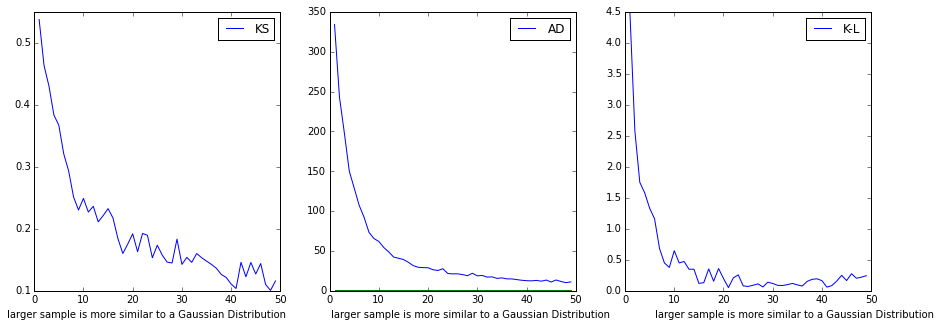

In [8]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L')

pl.legend()

figtext(.10, .05, "larger sample is more similar to a Gaussian Distribution", rotation='horizontal')
figtext(.40, .05, "larger sample is more similar to a Gaussian Distribution", rotation='horizontal')
figtext(.70, .05, "larger sample is more similar to a Gaussian Distribution", rotation='horizontal')

We see from the plot, if the sample size increases, test result "p value" decreases, which indicates the similarity of sample and Gaussian Distribution increases. 

###Now same n value, a larger p value.

(2) n = 50, p = 0.5

In [30]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)
p=0.5
for i,n in enumerate(narray):
    p=0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    #run the tests. 
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, sqrt(n*p*(1.0-p))))[0]
    #ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    

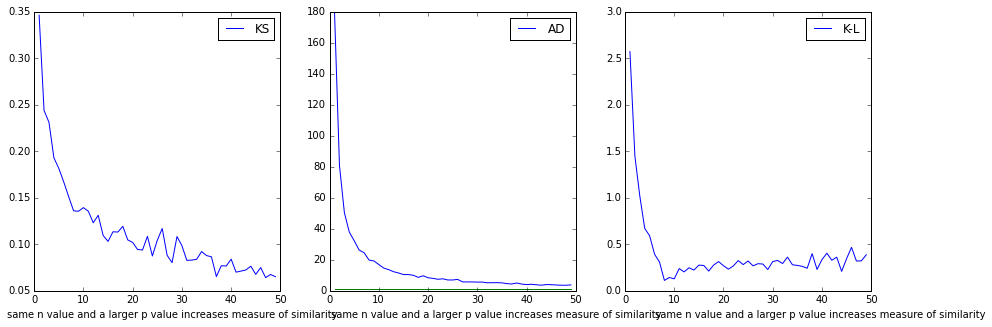

In [31]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L')

pl.legend()

figtext(.10, .05, "same n value and a larger p value increases measure of similarity", rotation='horizontal')
figtext(.40, .05, "same n value and a larger p value increases measure of similarity", rotation='horizontal')
figtext(.70, .05, "same n value and a larger p value increases measure of similarity", rotation='horizontal')

###Now Same p value, a larger n value

(3) n = 500, p = 0.5

In [32]:
narray = range(1,500,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)
p=0.5
for i,n in enumerate(narray):
    p=0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.binomial(n, p, 1000)
    #run the tests. 
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, sqrt(n*p*(1.0-p))))[0]
    #ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])

    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    

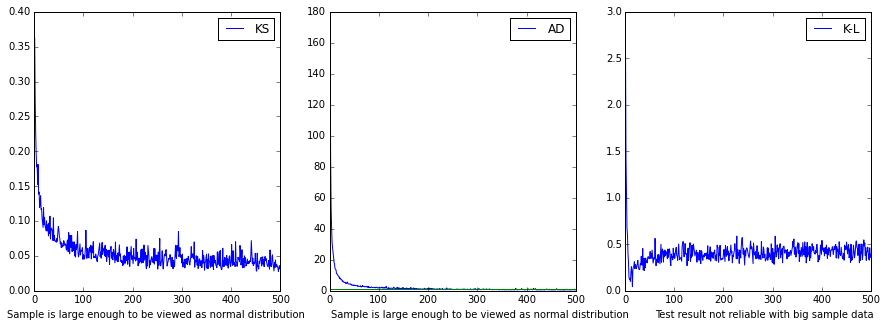

In [33]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L')

pl.legend()

figtext(.10, .05, "Sample is large enough to be viewed as normal distribution", rotation='horizontal')
figtext(.40, .05, "Sample is large enough to be viewed as normal distribution", rotation='horizontal')
figtext(.70, .05, "Test result not reliable with big sample data", rotation='horizontal')

#POISSON

(1) n = 50, p = 0.1

In [3]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

for i,n in enumerate(narray):
    p=0.1 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, np.sqrt(n))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    

SyntaxError: invalid syntax (<ipython-input-3-5297e5e0d687>, line 13)

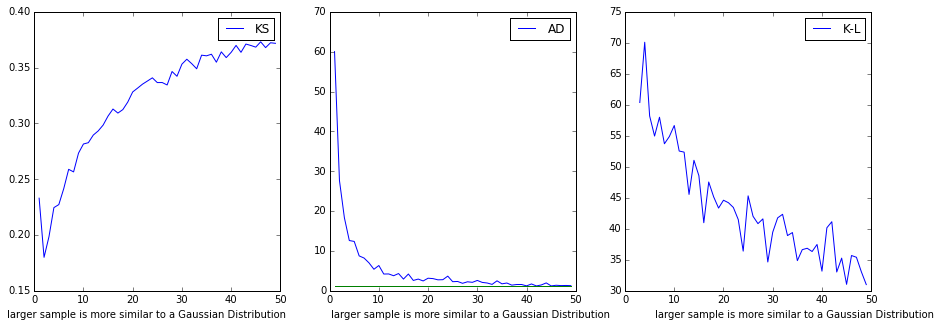

In [36]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

figtext(.10, .05, "larger sample is more similar to a Gaussian Distribution", rotation='horizontal')
figtext(.40, .05, "larger sample is more similar to a Gaussian Distribution", rotation='horizontal')
figtext(.70, .05, "larger sample is more similar to a Gaussian Distribution", rotation='horizontal')

###Now same n value, a larger p value.

(2) n = 50, p = 0.5

In [38]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

for i,n in enumerate(narray):
    p=0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    

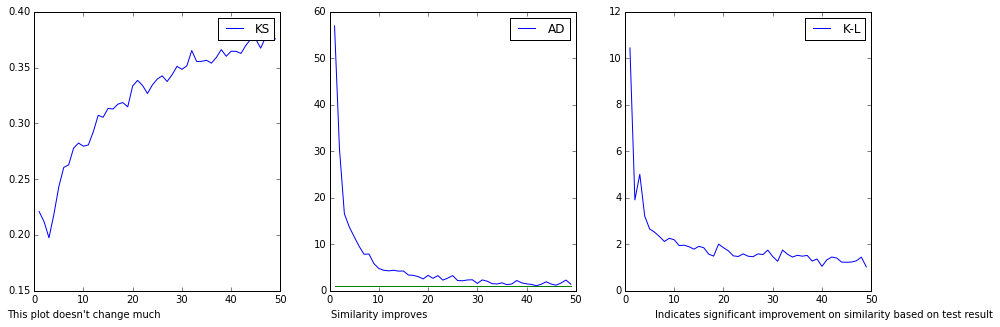

In [41]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

figtext(.10, .05, "This plot doesn't change much", rotation='horizontal')
figtext(.40, .05, "Similarity improves", rotation='horizontal')
figtext(.70, .05, "Indicates significant improvement on similarity based on test result", rotation='horizontal')

###Now Same p value, a larger n value

(3) n = 500, p = 0.5

In [42]:
narray = range(1,500,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

for i,n in enumerate(narray):
    p=0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = np.random.poisson(n, 1000)
    #run the tests. 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
        
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    

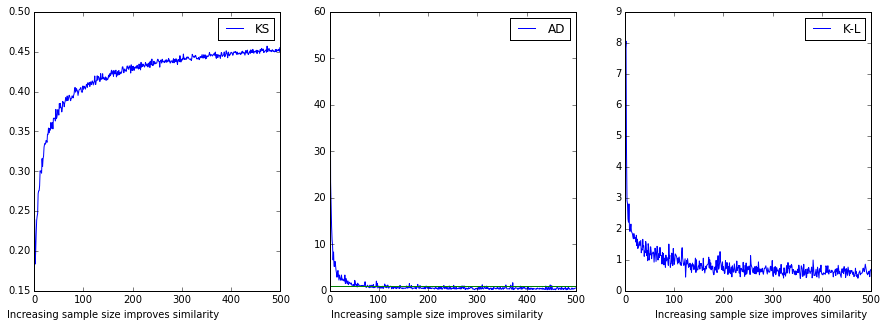

In [44]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

figtext(.10, .05, "Increasing sample size improves similarity", rotation='horizontal')
figtext(.40, .05, "Increasing sample size improves similarity", rotation='horizontal')
figtext(.70, .05, "Increasing sample size improves similarity", rotation='horizontal')

###Goodness of  fit on CitiBike data

Test whether a gaussian model for the age distribution of CitiBike drivers is a sensible model, and **if you dare**, try and find a better fit with another distribution! Use 2 tests (from the previous exercise) to do this. Test at least 2 distributions. 

Divide your riders sample by seasons: Spring+Summer vs FallWinter. Test how well a normal distribution describes each sample of age distributions. Choose 2 test between: KS, Anderson Darling, Chi2, KL, or any other test for goodness of fit!  If you have other ideas let me know and, unless there is a conceptual objection to using the test you are thinking of you can use whatever you want.

Choose a second functional form for the comparison (poisson, gamma……. whatever other distributions). Is it better or worse than the normal distribution fit? 

Optional (extra credit): Divide your sample geographically: by Borrow + split Manhattan in an Uptown and a Downtown sample (use your discretion to choose the separation line) and see if you notice any differences in how the age distribution can be modeled. 

###Files:
I used January (Winter) and September (Fall) of year 2015 citibike data as "Fall + Winter" Data   
I used March (Spring) and June (Summer) of year 2015 citibike data as "Spring + Summer" Data   
###Please store file in the local folder when run my ipython program.

Merge databases and use length to confirm merge. For instance, len(W) = len(W1) + len(W2)

In [2]:
df_W1=pd.read_csv('201501-citibike-tripdata.csv')
df_W2=pd.read_csv('201509-citibike-tripdata.csv')
df_W=df_W1.append(df_W2)
print len(df_W1), len(df_W2), len(df_W)
df_S1=pd.read_csv('201503-citibike-tripdata.csv')
df_S2=pd.read_csv('201506-citibike-tripdata.csv')
df_S=df_S1.append(df_S2)
print len(df_S1), len(df_S2), len(df_S)

285552 1289699 1575251
341826 941219 1283045


In [3]:
#df is the dataframe where the content of the csv file is stored
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

ValueError: cannot reindex from a duplicate axis

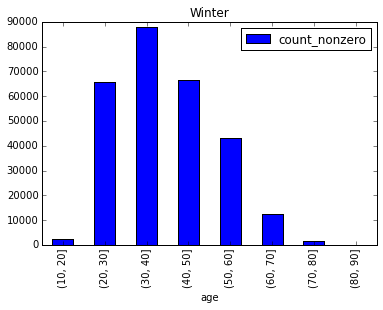

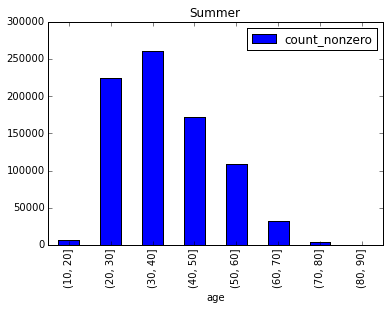

In [66]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])

In [74]:
#compare to normal

ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to poisson 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
winter, normal fit (0.99999637418970078, 0.0)
summer, normal fit (0.9999987788873137, 0.0)


In [75]:
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)


In [76]:
def mydistribution(size, m0, m1):
    #this is a crazy dumb function, but i am trying to make a point here...
    return (np.empty_like(size)+1) * m0 **2

In [77]:
ksW=scipy.stats.kstest(W_age_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_age_dist, mydistribution, args=(35,38))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (319324425.0, nan)
summer, normal fit (107543975.0, nan)
